**Анализ в online-магазине - приоритизация гипотез и A/B тест**


**Описание проекта**

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

Данные для первой части
Файл /datasets/hypothesis.csv. 

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv. 

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
#импорт библиотек
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#формируем датасеты

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### ИЗУЧИМ ДАННЫЕ И ВЫПОЛНИМ ПРЕДОБРАБОТКУ.


In [3]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#проверка дубликатов
hypothesis.duplicated().sum()

0

В таблице hypothesis представлены 9 гипотез с оценками по 10-ти балльной шкале охватов, влияния на пользователей, уверенности в гипотезе, затратов на ресурсы. С таблицей hypothesis все в порядке(типы данных верные,дубликатов нет)

In [6]:
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
#проверка дубликатов
orders.duplicated().sum()

0

In [9]:
# подсчёт пропусков
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
# поменяем тип данных
orders['date'] = pd.to_datetime(orders['date'])


В таблице orders представлена информация о заказах. С таблицей orders в целом тоже все в порядке(пропусков и дубликатов нет). Поменяли тип данных с столбце 'date'

In [11]:
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
#проверка дубликатов
visitors.duplicated().sum()

0

In [14]:
# подсчёт пропусков
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
# поменяем тип данных
visitors['date'] = pd.to_datetime(visitors['date'])

В таблице visitors представлена информация о пользователях и информация о группе пользователя (А или В). С таблицей visitors пропусков и дубликатов нет. Поменяли тип данных с столбце 'date'

**Вывод** : пропуски и дубликаты в данных отсутствуют. Мы подготовили данные для анализа:  заменили тип данных в столбцах. 

In [16]:
#количество групп в А/Б тесте
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Найдем уникальные id пользователей группы А и группы В, и посмотрим, если пересечение у этих двух множеств

In [17]:
#проверим не попадают ли у нас пользователи в обе группы:
len(np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique()))

58

58 значений, встречающихся в обеих группах.  Удаляем тех пользователей, которые входят в список пересекающихся, чтобы не было дополнительных искажений при проведении тестирования.

In [18]:
#создаем массив с пользователями, которые входят в список пересекающихся
list_id = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())

#переведем массив в список
list_id = list_id.tolist()

#удаляем тех пользователей, которые входят в список пересекающихся
orders = orders[~orders.visitorId.isin(list_id)]

In [19]:
#проверяем пользователей, которые входят в список пересекающихся
len(np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique()))

0

In [20]:
#За какой период  доступны данные (даты начала и окончания теста)
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [21]:
visitors.tail(3)

,date,group,visitors
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


Дата начала теста 01 августа 2019 г

Дата окончания теста 31 августа 2019 г

### ПРИОРИТЕЗАЦИЯ ГИПОТЕЗ.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
    
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.



In [22]:
# код, чтобы отобразить название гипотезы полностью в таблицах
pd.options.display.max_colwidth = 210
# приоритизации задач ICE
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(1)
hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [23]:
# приоритизации задач RICE
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False)


,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод** Результаты преоритизации задач ICE и RICE отличаются друг от друга тк RICE учитывает скольких пользователей затронет изменение.

В ICE лидируют гипотезы 8,0,7

В RICE лидируют гипотезы 7,2,0

*Потенциально удачная гипотеза 7 "Добавить форму подписки на все основные страницы"*


### АНАЛИЗ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализируйте A/B-тест:

1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4.Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

5.Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10.Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12.Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14.Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

1.Построим график кумулятивной выручки по группам.Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates().Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий.Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков


In [24]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum',}),axis=1,).sort_values(by=['date', 'group'])

#Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),axis=1,).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования

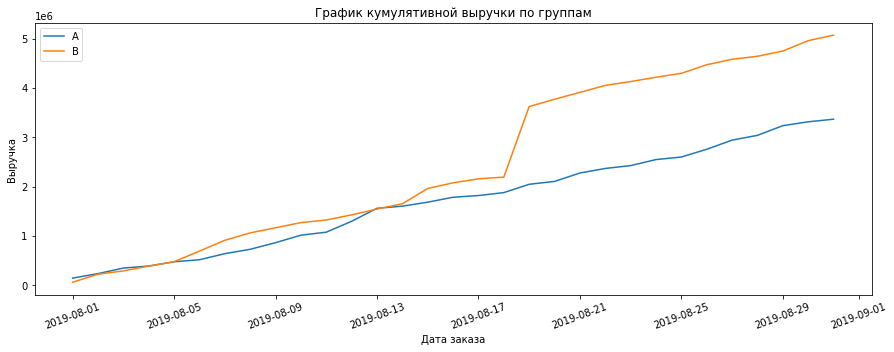

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=20)
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата заказа")
plt.legend() 
plt.show()

Выручка почти равномерно увеличивается до 13 августа. 
Однако график выручки группы В  резко растутпосле 13 и 19 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 


2.Построим график кумулятивного среднего чека по группам. 

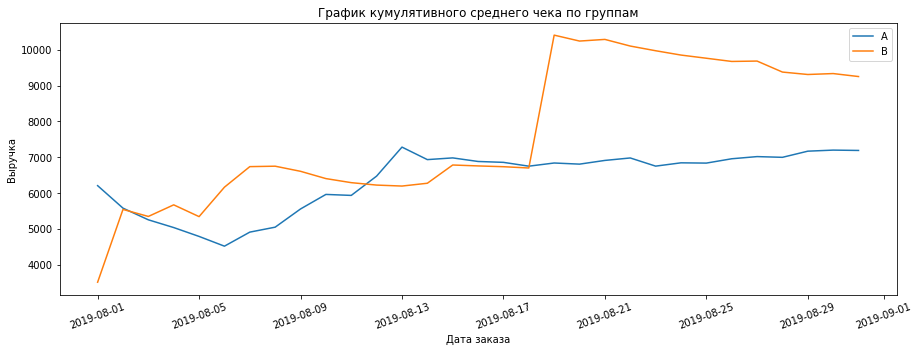

In [26]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=20)
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата заказа")
plt.legend() 
plt.show()


Средний чек тоже в группе В как правило выше, за исключением чека за 13 августа, где виден скачок.

3.Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

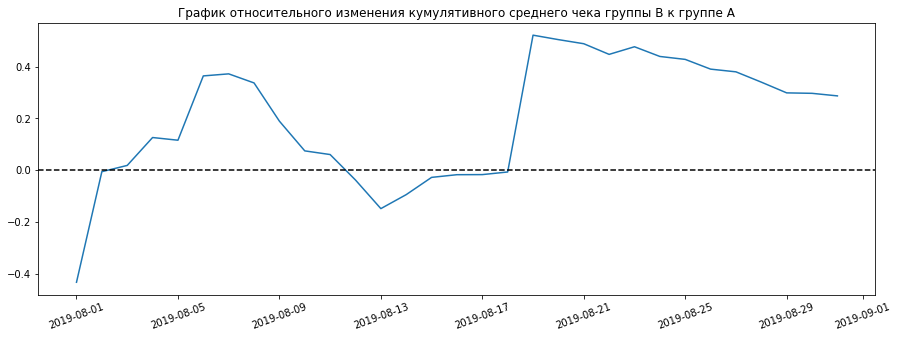

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=20)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') 
plt.show()

В нескольких точках график различия между сегментами резко «скачет», видимо, из-за крупных заказов и выбросов

4.Построим график кумулятивного среднего количества заказов по группам.

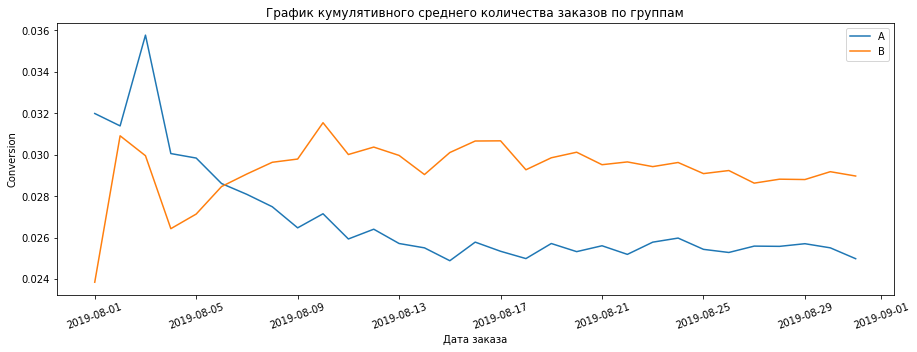

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xticks(rotation=20)
plt.legend()
plt.title('График кумулятивного среднего количества заказов по группам')
plt.ylabel('Conversion')
plt.xlabel("Дата заказа")
plt.show()

Конверсия группы B  значительно выше конверсии группы A 

5.Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. 

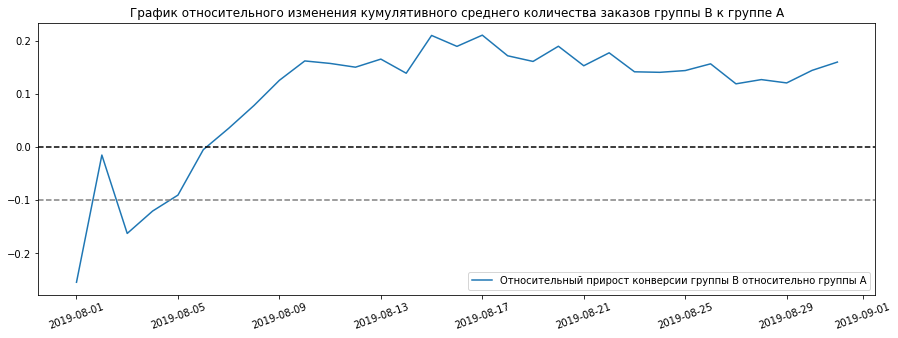

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
plt.figure(figsize=(15,5))
plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.xticks(rotation=20)
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Относительный прирост конверсии группы В увеличился до 10-20%.

6.Построим точечный график количества заказов по пользователям

In [30]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


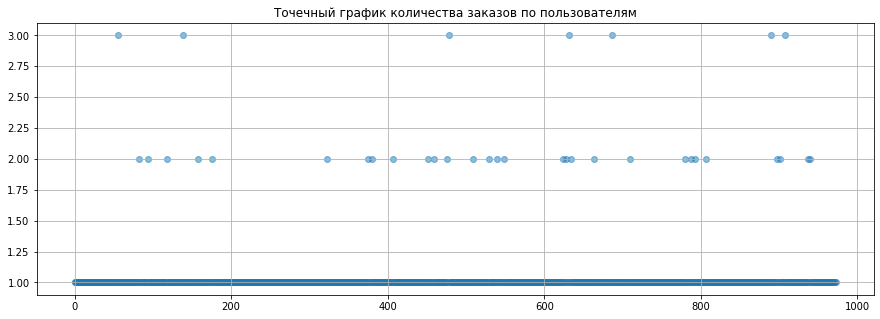

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5)
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Больше всего пользователей которые совершили 1 заказ. Меньшее количество пользователей, которые совершили 2 заказа.  Количество пользователей, которые совершили 3 заказа и более меньше, их точная доля не ясна — непонятно, считать их аномалиями или нет. 
Посчитаем выборочные перцентили количества заказов на одного пользователя


7.Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [32]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Большинство пользователей делают 1 или 2 заказа. Всё что выше - это аномалия

8.Построим точечный график стоимостей заказов.

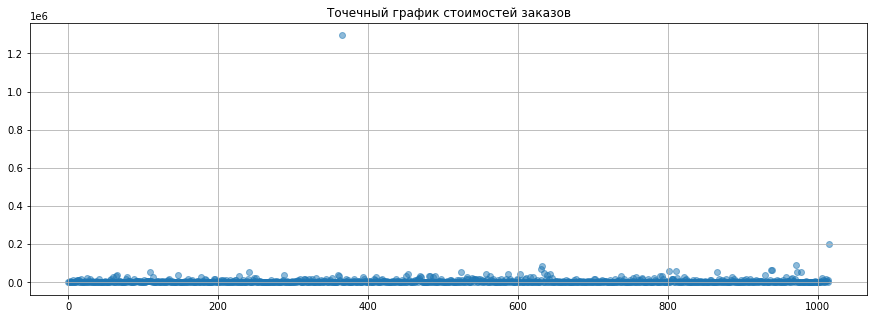

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.show()

Стоимость заказов варьируют до 100 000. Есть выброс в районе 200 000 и в районе 1 300 000 рублей. Найдем выборочные перцентили. 


9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Определим границу для определения аномальных заказов.

In [34]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не больше, чем  1% заказов  дороже 53904. Это и будет границей для определения аномальных заказов

10.Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.

Соберем все данные по заказам и визитам, их кумулятивные показатели в одну таблицу. Для этого создадим несколько таблиц и затем объединим их

In [35]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет.
Альтернативная гипотеза: статистически значимые различия есть.

In [36]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель группы B к группе A = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value = 0.011
Относительный показатель группы B к группе A = 0.160


p-value = 0.011, что меньше альфа 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем.  
По «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы B над A равен 16% .

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Нулевая гипотеза: статистически значимых различий в средних чеках между группами нет. 
Альтернативная гипотеза: статистически значимые различия есть.

In [37]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель группы B к группе A = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value = 0.829
Относительный показатель группы B к группе A = 0.287


P-value значительно больше 0.05 и равно 0,829. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом, средний чек группы B значительно выше среднего чека группы A на 28,7%.

12.Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. 

Аномальное количество заказов 3 и больше заказов , аномальная сумма заказза более  53904. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53904 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape.

In [38]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64

16

Всего 16 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

Сначала подготовим выборки количества заказов по пользователям по группам теста.Применим статистический критерий Манна-Уитни к полученным выборкам.

Нулевая гипотеза: статистически значимых различий в конверсии между группами нет. 
Альтернативная гипотеза: статистически значимые различия есть.

In [39]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель группы B к группе A ={0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.007
Относительный показатель группы B к группе A =0.189


p-value = 0.007 (меньше 0.05). Значит, нулевую гипотезу  отвергаем. Это значит, что и по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы B над A равен 18,9% 

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза: статистически значимых различий в средних чеках между группами нет. 
Альтернативная гипотеза: статистически значимые различия есть.

In [40]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель группы B к группе A ={0:.3f}".format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value = 0.788
Относительный показатель группы B к группе A =-0.032


р-value = 0.788 (больше 0.05). Значит,  нулевую гипотезу не отвергаем. Статистически значимых различий в средних чеках между группами нет.При этом средний чек группы B оказался незначительно (на 3,2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше  на 28,7% по причине наличия аномального заказа 


    
Также хочу добавить, что критерий Манна-Уитни ранговый поэтому он устойчив к выбросам. 
Это означает, что данные ранжируются, выброс будет просто распознаваться как случай, который ранжируется на единицу выше (или ниже) следующего наблюдения, поэтому сильного влияния на p-value выбросы не оказывают.

14.Примите решение по результатам теста и объясните его (в выводе). 

Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Вывод**

•	Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

•	По сырым данным и после фильтрации аномалий нет статистически значимого различия по среднему чеку между группами. 

Проведен расчет статистической  значимости различий в среднем количестве заказов между группами по «сырым» данным. Нулевая гипотеза: статистически значимых различий в конверсии между группами нет. Альтернативная гипотеза: статистически значимые различия есть. p-value = 0.011, что меньше альфа 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. По «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы B над A равен 16% .

Проведен расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Нулевая гипотеза: статистически значимых различий в средних чеках между группами нет. Альтернативная гипотеза: статистически значимые различия есть. P-value значительно больше 0.05 и равно 0,829. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом, средний чек группы B значительно выше среднего чека группы A на 28,7%.

Проведен расчет статистической  значимости различий в среднем количестве заказов между группами по «очищенным» данным. Нулевая гипотеза: статистически значимых различий в конверсии между группами нет. Альтернативная гипотеза: статистически значимые различия есть. p-value = 0.007 (меньше 0.05). Значит, нулевую гипотезу  отвергаем. Это значит, что и по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы B над A равен 18,9%

Проведен расчет статистической различий в среднем чеке заказа между группами по «очищенным» данным. Нулевая гипотеза: статистически значимых различий в средних чеках между группами нет. Альтернативная гипотеза: статистически значимые различия есть. р-value = 0.788 (больше 0.05). Значит, нулевую гипотезу не отвергаем. Статистически значимых различий в средних чеках между группами нет.При этом средний чек группы B оказался незначительно (на 3,2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше на 28,7% по причине наличия аномального заказа


•	Рекомендуется В версию страницы А/Б  отправлить на главную страницу сайта. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

Можно остановить тест, признать его успешным.
